This is a playground for coordinate mapping

In [188]:
import os
import pyexiv2
import numpy as np
import georef2
import matplotlib.pyplot as plt

In [189]:
import os
import pyexiv2
img_file_list = sorted(os.listdir("DJI_202508081433_021_PineIslandbog5H3m5x3photo"))
for i in range(13):
    img_path = os.path.join("DJI_202508081433_021_PineIslandbog5H3m5x3photo", img_file_list[i])
    img = pyexiv2.Image(img_path)
    xmp_data = img.read_xmp()
    gps = (float(xmp_data["Xmp.drone-dji.GpsLatitude"]), float(xmp_data["Xmp.drone-dji.GpsLongitude"]))
    cart = georef2.GPS_to_Cartesian(gps)
    print(f"Image: {img_file_list[i]}, GPS: {gps}, Cartesian: {cart}")

Image: DJI_20250808143604_0001_D_Waypoint1.JPG, GPS: (39.745344789, -74.521732158), Cartesian: (np.float64(1307309.3120632013), np.float64(-4720957.818851123))
Image: DJI_20250808143611_0002_D_Waypoint2.JPG, GPS: (39.745353329, -74.521697992), Cartesian: (np.float64(1307311.9651799763), np.float64(-4720956.454155273))
Image: DJI_20250808143617_0003_D_Waypoint3.JPG, GPS: (39.745359453, -74.521664208), Cartesian: (np.float64(1307314.6326602488), np.float64(-4720955.263710784))
Image: DJI_20250808143622_0004_D_Waypoint4.JPG, GPS: (39.745365609, -74.521631117), Cartesian: (np.float64(1307317.2424318425), np.float64(-4720954.086884372))
Image: DJI_20250808143626_0005_D_Waypoint5.JPG, GPS: (39.745371669, -74.521597253), Cartesian: (np.float64(1307319.9177162035), np.float64(-4720952.898996518))
Image: DJI_20250808143632_0006_D_Waypoint6.JPG, GPS: (39.745378856, -74.521563527), Cartesian: (np.float64(1307322.560245625), np.float64(-4720951.637037298))
Image: DJI_20250808143638_0007_D_Waypoint

In [190]:
import matplotlib.pyplot as plt

for i in range(1):
    img1 = pyexiv2.Image(os.path.join("DJI_202508081433_021_PineIslandbog5H3m5x3photo", img_file_list[i]))
    img2 = pyexiv2.Image(os.path.join("DJI_202508081433_021_PineIslandbog5H3m5x3photo", img_file_list[i+1]))
    gps1 = float(img1.read_xmp()['Xmp.drone-dji.GpsLatitude']), float(img1.read_xmp()['Xmp.drone-dji.GpsLongitude'])
    gps2 = float(img2.read_xmp()['Xmp.drone-dji.GpsLatitude']), float(img2.read_xmp()['Xmp.drone-dji.GpsLongitude'])
    cart1 = georef2.GPS_to_Cartesian(gps1)
    cart2 = georef2.GPS_to_Cartesian(gps2)
    vector1 = np.array([cart2[0]-cart1[0], cart2[1]-cart1[1]])
    delta_y = np.sqrt((cart2[0]-cart1[0])**2 + (cart2[1]-cart1[1])**2)
    vector2 = np.array([0, 3])
    # print(vector * e1)
    print(vector1)
    print(vector2)

[2.65311677 1.36469585]
[0 3]


[]

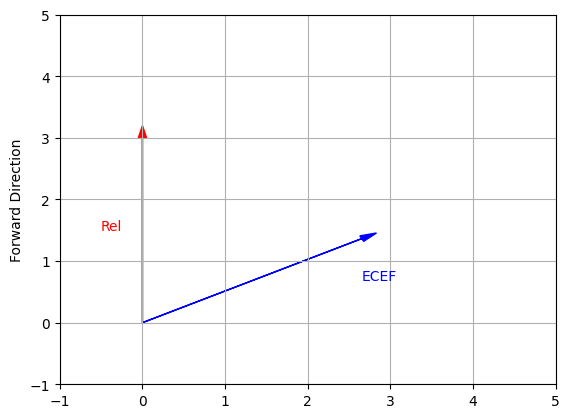

In [191]:
fig, ax = plt.subplots()
plt.ylabel("Forward Direction")
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
ax.grid(True)

ax.arrow(0, 0, vector1[0], vector1[1], head_width=0.1, head_length=0.2, fc='blue', ec='blue')
ax.text(1*vector1[0], 0.5*vector1[1], 'ECEF', color='blue')
ax.arrow(0, 0, vector2[0], vector2[1], head_width=0.1, head_length=0.2, fc='red', ec='red')
ax.text(-0.5, 0.5*vector2[1], 'Rel', color='red')


plt.plot()

In [192]:
# calculate angle between two vectors
# v1 dot v2 = |v1| |v2| cos(theta)
dot_product = np.dot(vector1, vector2)
magnitude_v1 = np.linalg.norm(vector1)
magnitude_v2 = np.linalg.norm(vector2)
cos_theta = dot_product / (magnitude_v1 * magnitude_v2)
print("Cosine of angle between vectors:", cos_theta)
angle_rad = np.arccos(cos_theta)
print("Angle in radians:", angle_rad)

Cosine of angle between vectors: 0.45741051262888444
Angle in radians: 1.0957152882909473


[]

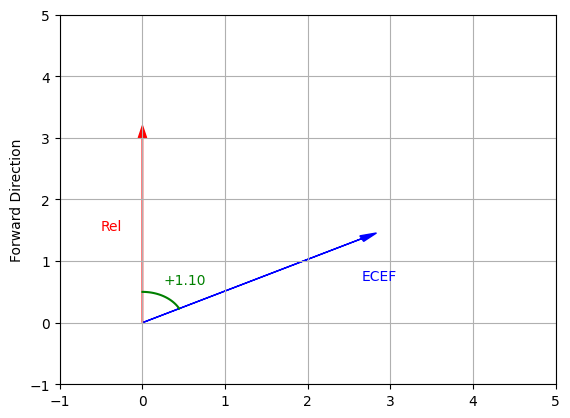

In [193]:
fig, ax = plt.subplots()
plt.ylabel("Forward Direction")
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 5)
ax.grid(True)

ax.arrow(0, 0, vector1[0], vector1[1], head_width=0.1, head_length=0.2, fc='blue', ec='blue')
ax.text(1*vector1[0], 0.5*vector1[1], 'ECEF', color='blue')
ax.arrow(0, 0, vector2[0], vector2[1], head_width=0.1, head_length=0.2, fc='red', ec='red')
ax.text(-0.5, 0.5*vector2[1], 'Rel', color='red')

theta = np.linspace(0, angle_rad, 50)
r = 0.5
x = r * np.cos(theta + np.pi/2 - angle_rad)
y = r * np.sin(theta + np.pi/2 - angle_rad)
plt.text(x[25], y[25] + 0.2, f"+{angle_rad:.2f}", color='green')
ax.plot(x, y, color='green')

plt.plot()

perform mapping from ECEF -> relative

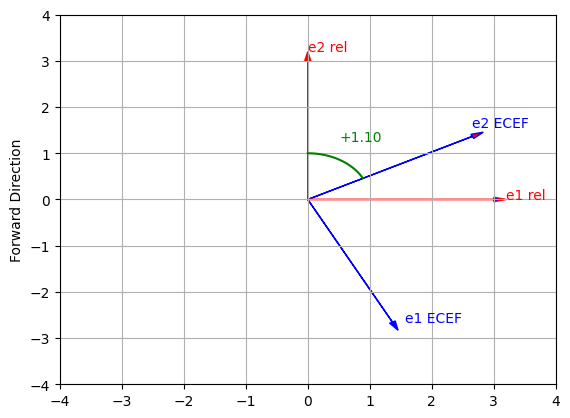

In [194]:
# setting up basis vectors
e2_ecef = vector1
e1_x = e2_ecef[1]
e1_y = -e2_ecef[0]
e1_ecef = np.array([e1_x, e1_y])

e2_rel = vector2
e1_rel = np.array([3, 0])

fig, ax = plt.subplots()
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.grid(True)
plt.ylabel("Forward Direction")

ax.arrow(0, 0, e1_ecef[0], e1_ecef[1], head_width=0.1, head_length=0.2, fc='blue', ec='blue')
plt.text(e1_ecef[0] + 0.2, e1_ecef[1], 'e1 ECEF', color='blue')
ax.arrow(0, 0, e2_ecef[0], e2_ecef[1], head_width=0.1, head_length=0.2, fc='red', ec='blue')
plt.text(e2_ecef[0], e2_ecef[1]+0.2, 'e2 ECEF', color='blue')

ax.arrow(0, 0, e1_rel[0], e1_rel[1], head_width=0.1, head_length=0.2, fc='blue', ec='red')
plt.text(e1_rel[0] + 0.2, e1_rel[1], 'e1 rel', color='red')
ax.arrow(0, 0, e2_rel[0], e2_rel[1], head_width=0.1, head_length=0.2, fc='red', ec='red')
plt.text(e2_rel[0], e2_rel[1]+0.2, 'e2 rel', color='red')

theta = np.linspace(0, angle_rad, 50)
r = 1
x = r * np.cos(theta + np.pi/2 - angle_rad)
y = r * np.sin(theta + np.pi/2 - angle_rad)
plt.text(x[25], y[25] + 0.4, f"+{angle_rad:.2f}", color='green')
ax.plot(x, y, color='green')

plt.show()

In [195]:
# setting up standard matrix
# A: ECEF -> Relative
# A*e2_ecef = e2_rel
# A*e1_ecef = e1_rel
rotate_angle = angle_rad


